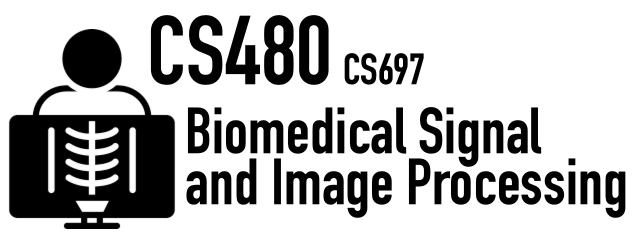
#Assignment 7

In [ ]:
# In this assignment, we will explore the Imaging Data Commons,
# a new service from the National Cancer Institute.
#
# We will find and explore a PET dataset and then perform a MIP reconstruction.

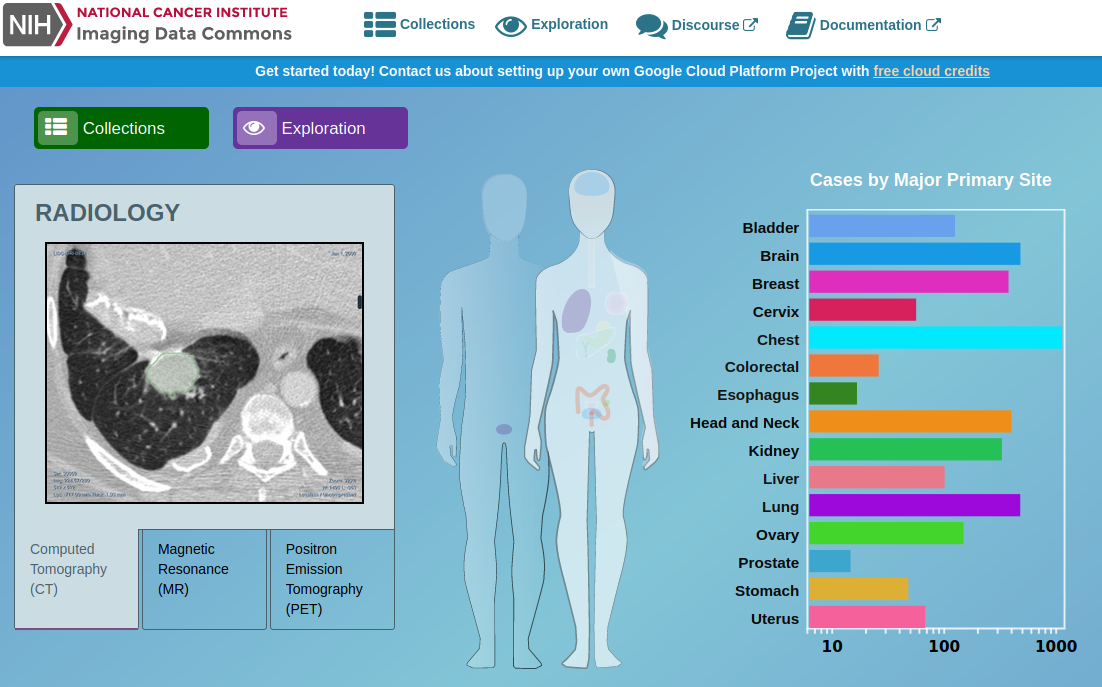

**Task 1**: Browse the IDC datasets and find a combined CT or MRI with PET! [15 Points]

In [ ]:
#
# Visit https://portal.imaging.datacommons.cancer.gov/ and find a dataset
# that includes structural imaging such as CT or MRI combined with a PET scan.
#
# You can start by selecting the type of a cancer case such as Bladder, Brain etc.
# Hint: Head and Neck include many PET scans.
#

In [ ]:
# TODO: Open the integrated OHIF viewer to view the data.
#
# 1) Select a collection, then a case, then a study in the IDC interface.
# 2) To open the OHIF viewer, click on the view icon.
# 3) Paste a screenshot of the viewer after the data was loaded below.
#

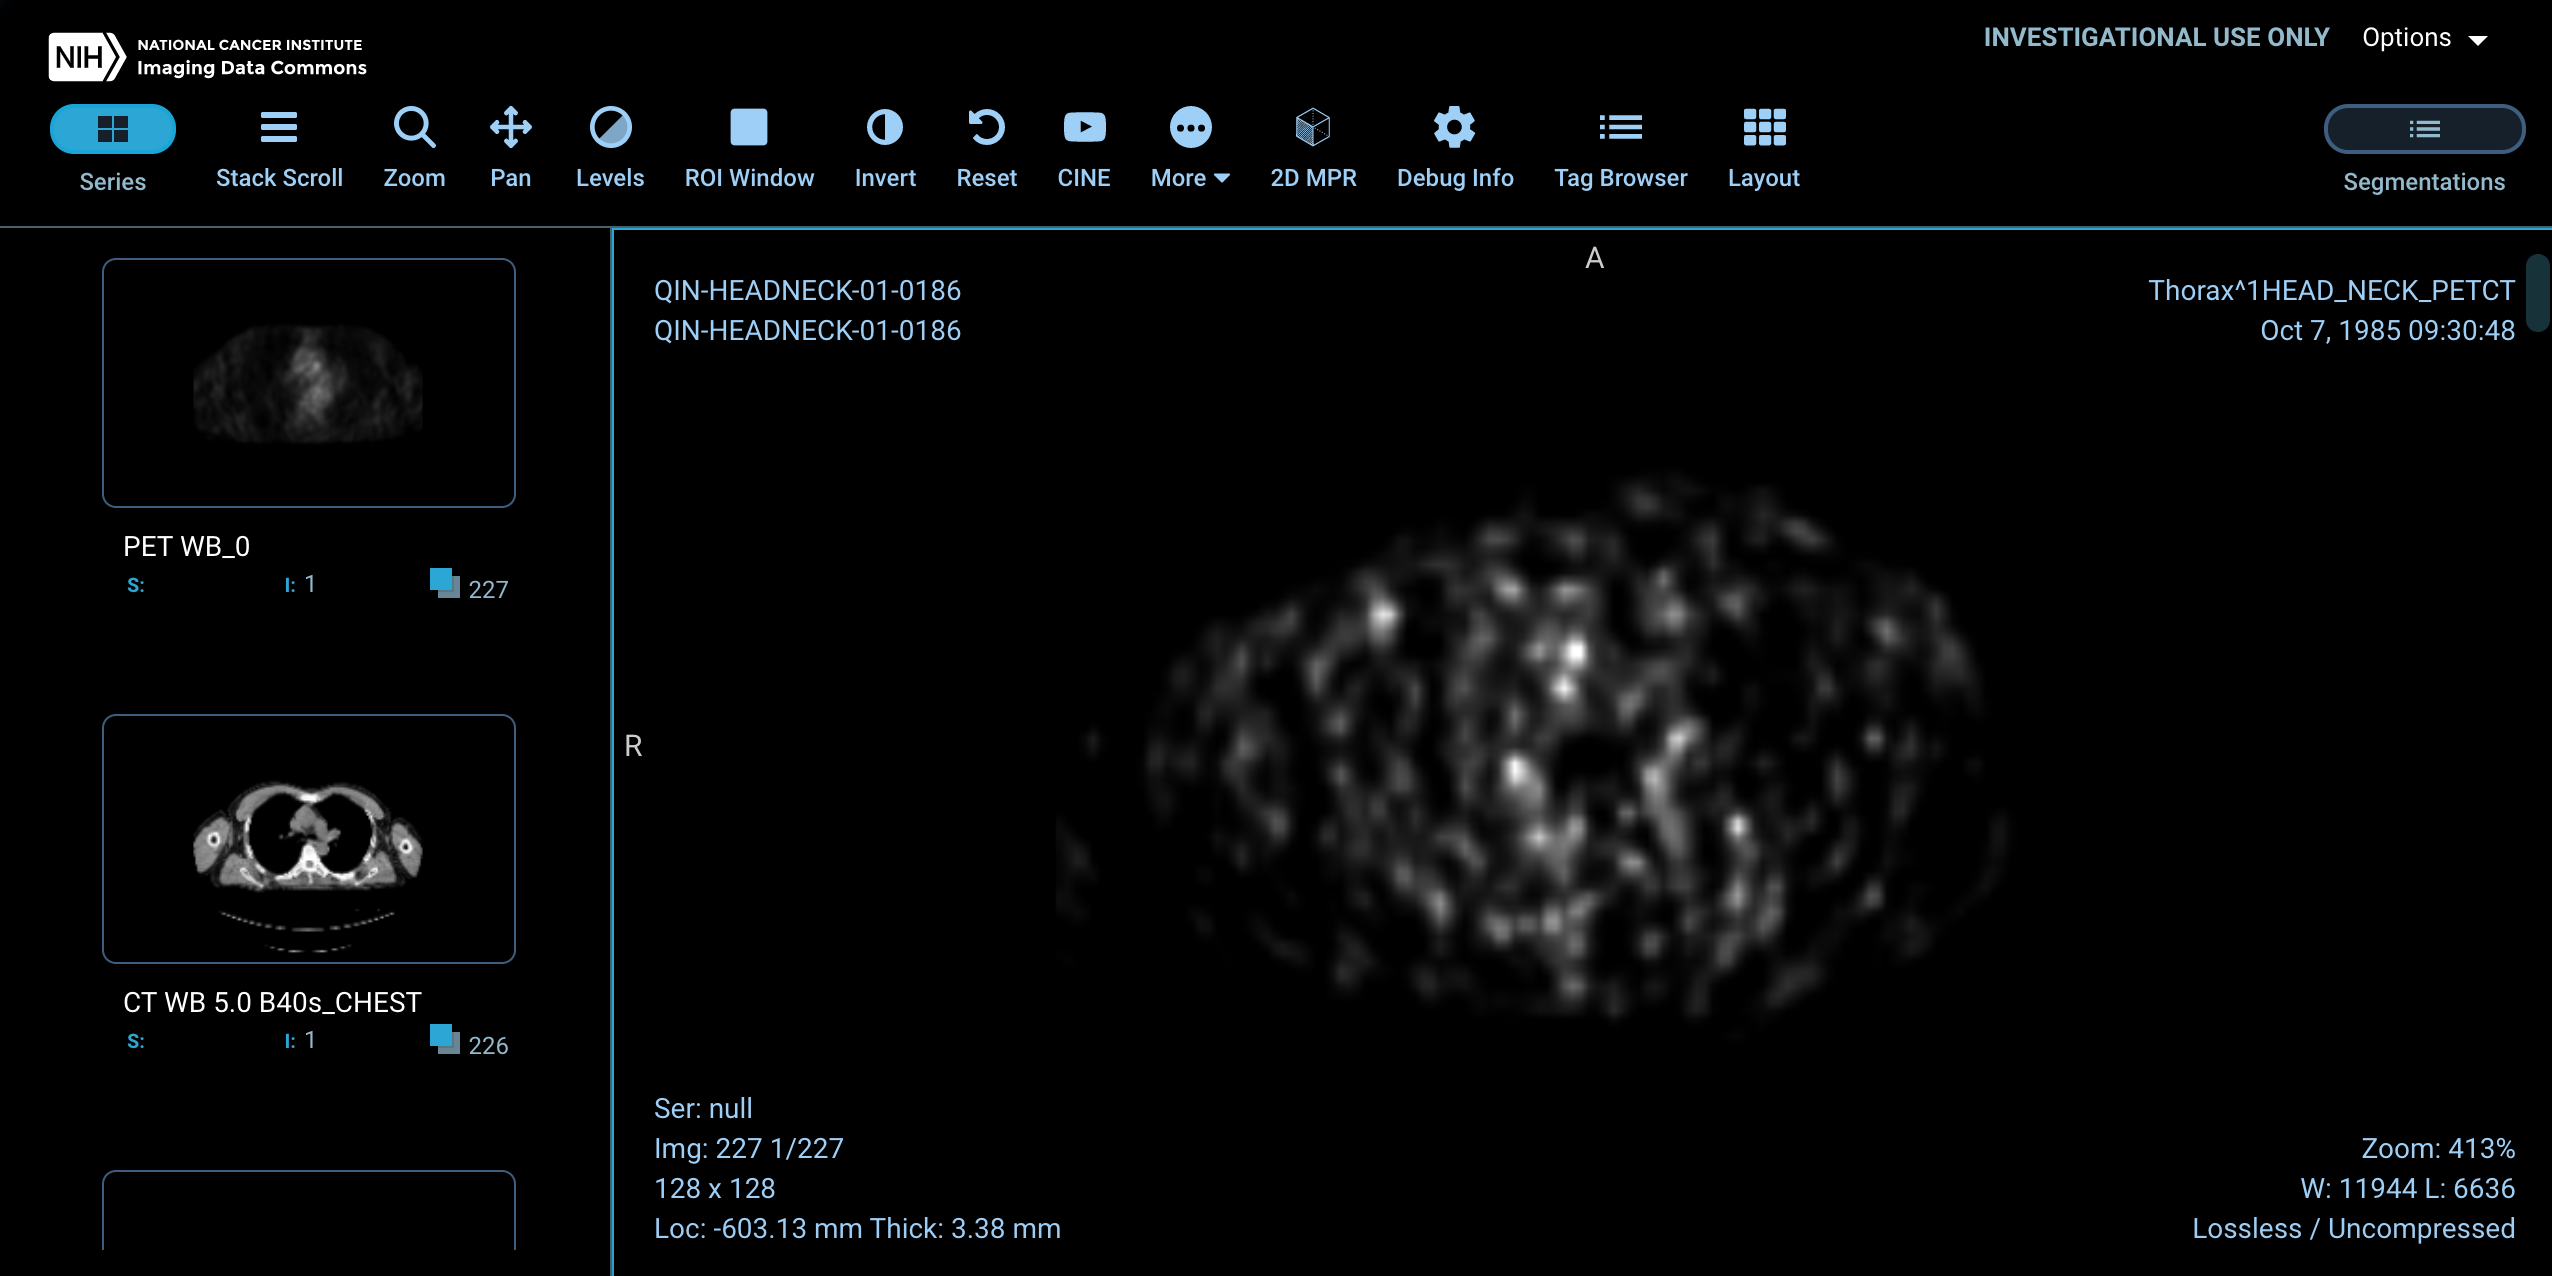

**Task 2**: Visualize structural and PET side-by-side! [30 Points]

In [ ]:
# In the OHIF viewer, please change the layout to show the structural image
# next to the PET scan.
#
# TODO: Use the LAYOUT functionality in the toolbar to switch to a 2-column layout.

In [ ]:
# TODO: Find the cancerous lesion.
#
# 1) Navigate through the PET image to find the cancerous lesion.

In [ ]:
# TODO: Sync the structural scan (CT or MR) to the PET scan with the lesion.
#
# Hint: The "Loc" label in the bottom left of both scans should roughly match.
# Hint 2: The Levels tool allows Window/Level adjustment to increase contrast.
#

In [ ]:
# TODO: Paste a screenshot showing the 2-column layout below.

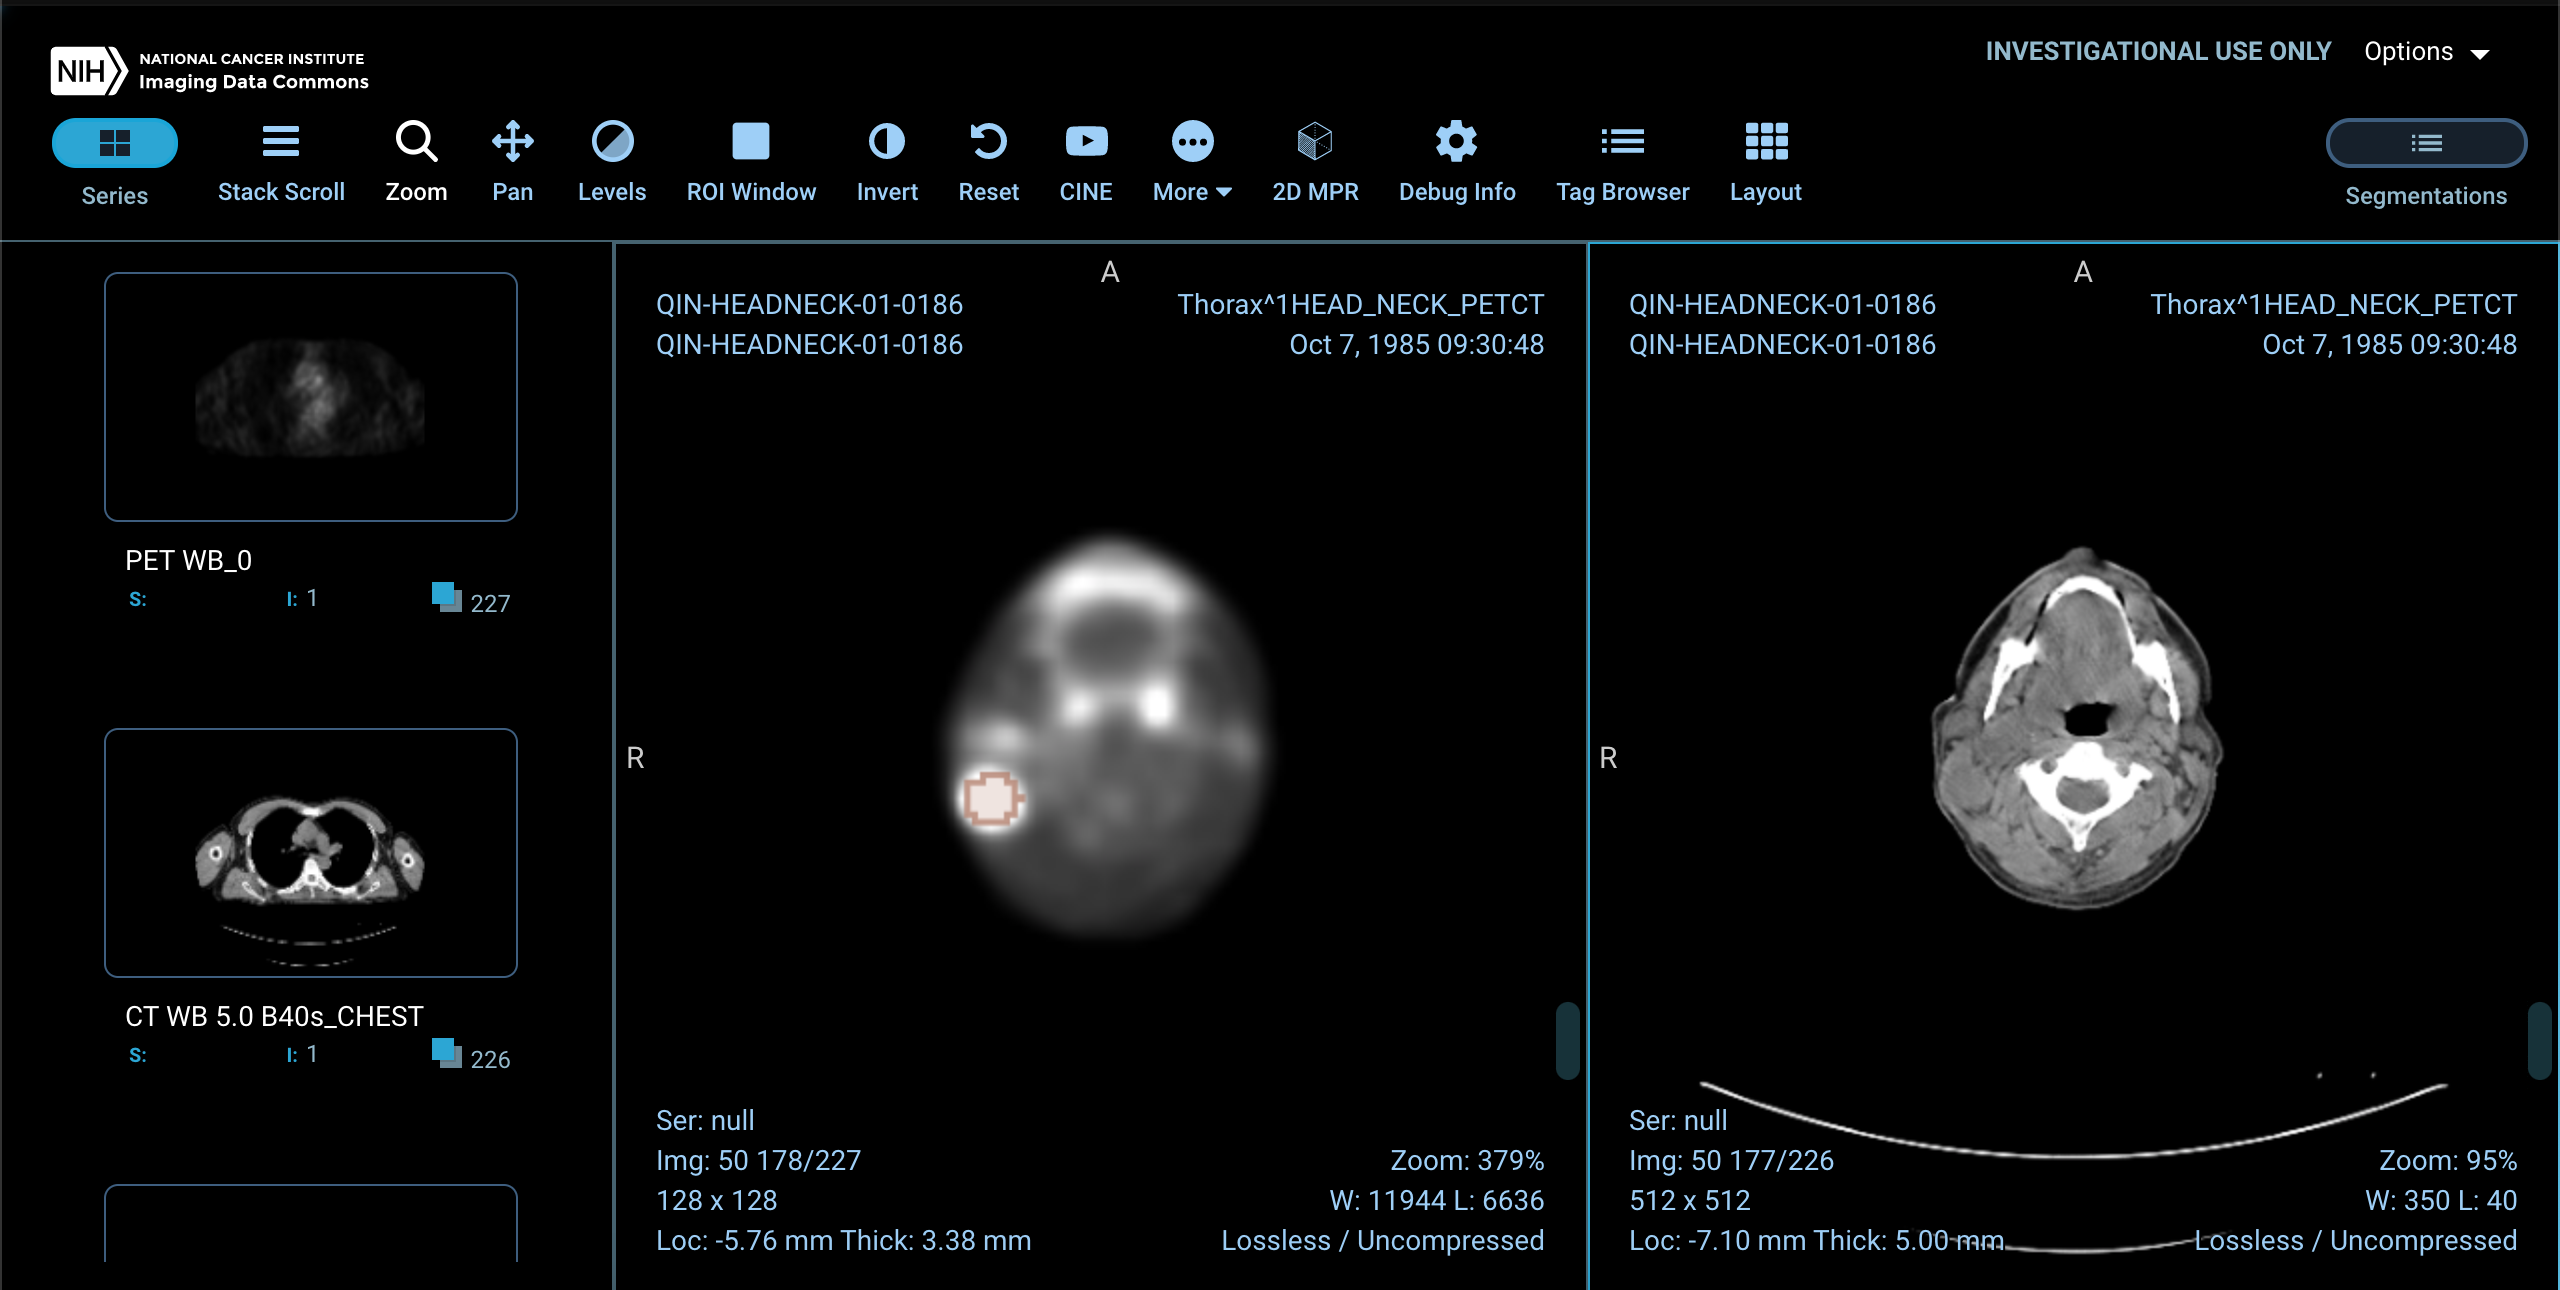

**Task 3**: Use an MIP to reslice the PET scan! [35 Points]

In [ ]:
# We will now use the 2D MPR functionality to look at the lesion from different
# orientations.
#
# Hint: This works best in Google Chrome.

In [ ]:
# Question 1): What is MPR?
#

In [ ]:
# MPR is short for Multiplanar reformation which describes the process of using the data from axial CT images to create nonaxial two-dimensional images.

In [ ]:
# Question 2): What is the difference between MIP, MinIP, AvgIP?
#

In [ ]:
# 1. Maximum intensity projection (MIP), is an algorithm where only voxel data with highest values through the volume are used along a ray and then projected onto 2D. MIP seems to be better if we are interested in the brighter/very dense parts of the image.
# 2. MinIP means minimum intensity projection and is the opposite of MIP, so we only use the lowest values. This might be helpful for darker areas e.g. air like in the lungs.
# 3. AIP or AvgIP (Average Intensity Projection) describes another type of algorithm used to thicken MPR. As the name says it takes the average of the values, so each pixel holding the average value of all equivalent pixels in the data set.

In [1]:
# reference: I read through the following publication: https://pubs.rsna.org/doi/full/10.1148/rg.255055044 
# Great publication, gives a good overview and explaining CT imaging with the different algorithms :) 

In [ ]:
# Now, please navigate to the lesion in all 3 orientations.
#
# TODO: Paste a screenshot below.
#

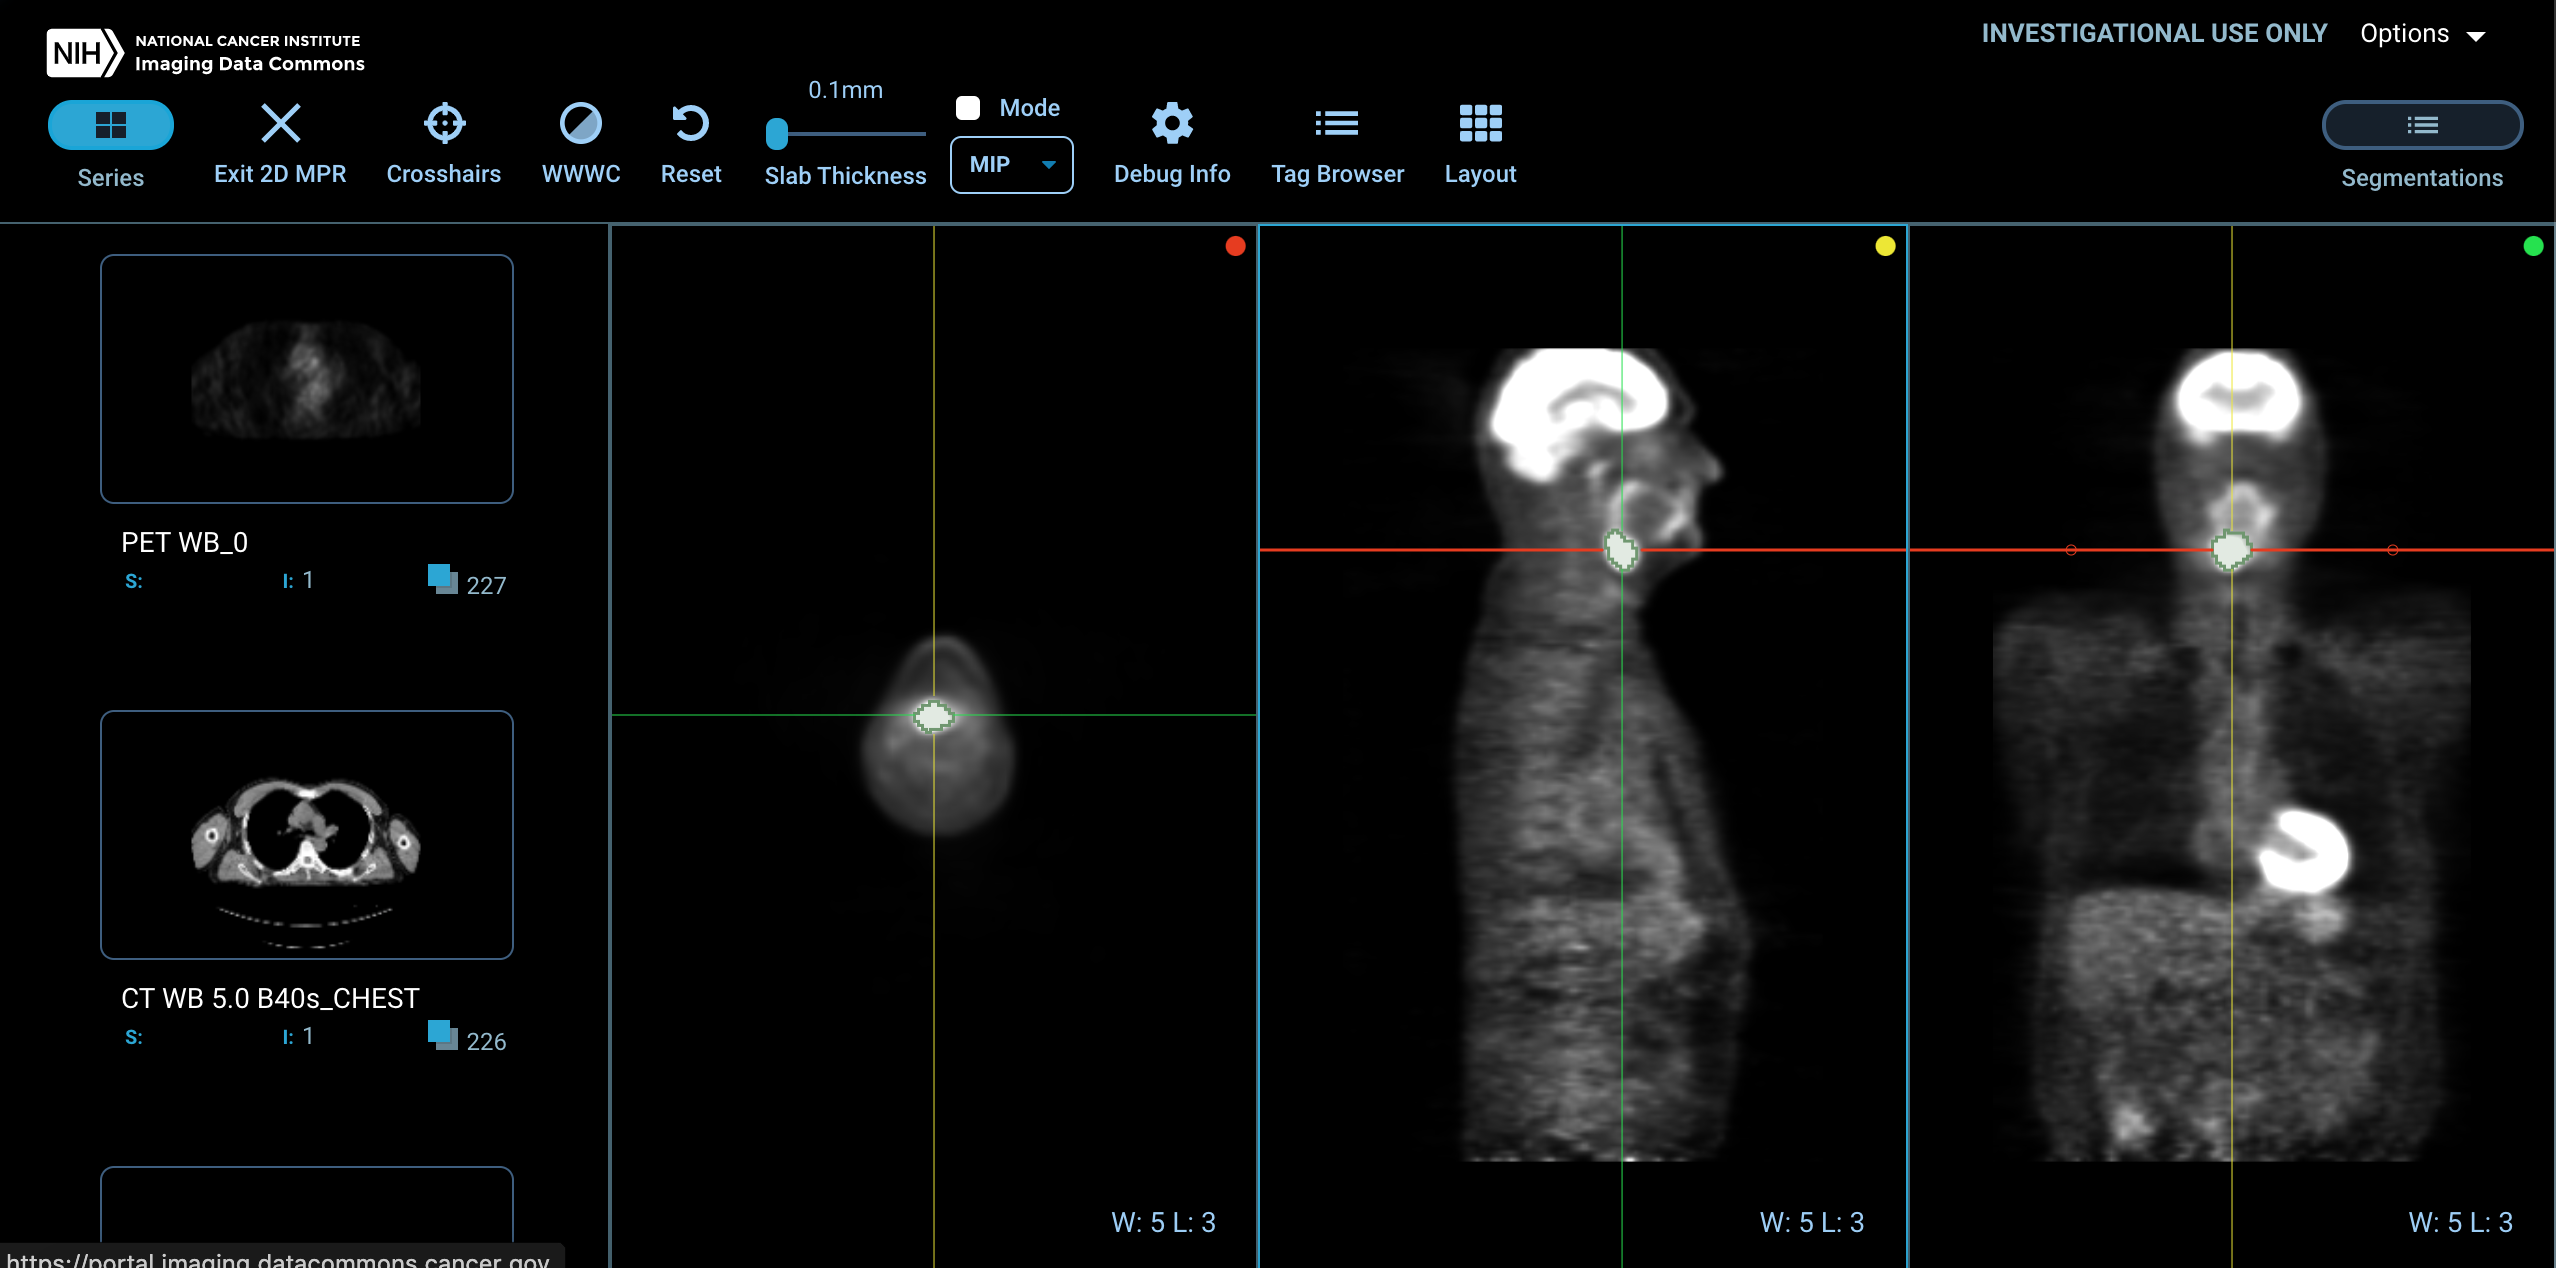

In [ ]:
# Question 3): What does the Slab Thickness slider do?
#

In [ ]:
# Depending on which mode is chosen (MIP, MinIP, AvgIp), the slab thickness slider seems to enlarge the highlighted areas. 
# Slab thickness seems to determine the amount of data/pixels that are included in the algorithmic calculation.
# So if we select MIP, the brighter values have more weight and are getting larger with increasing slab thickness.
# If MinIP is selected, the minimal values of the image increase with higher slab thickness. With AvgIP selected the image seems to put more weight on the average gray areas.

**Task 4**: Let's access the pixel data! [20 Points]

In [ ]:
# Please EXIT THE 2D MPR.
#
# We will now grab the pixel data of the currently displayed slice
# using the Javascript console.
#

In [ ]:
# 1) Open the Developer Tools of your browser and access the JS console.
#

In [ ]:
# 2) The following code allows to access the pixel data of the slice that
# is currently displayed.
#
# element = cornerstone.getEnabledElements()[0];
# pixels = element.image.getPixelData();
#

In [ ]:
# Question 4): What is the maximum pixel value of the current slice?
#
# Hint: There are multiple ways of doing this according to
# https://medium.com/coding-at-dawn/the-fastest-way-to-find-minimum-and-maximum-values-in-an-array-in-javascript-2511115f8621
#

In [ ]:
element = cornerstone.getEnabledElements()[0];
>> {element: div.viewport-element, canvas: canvas.cornerstone-canvas, image: {…}, invalid: false, needsRedraw: false, …}
pixels = element.image.getPixelData();
>> Int16Array(16384) [8, 5, 4, 4, 4, 4, 3, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 2, 2, 3, 3, 4, 5, 7, 9, 10, 11, 14, 17, 20, 21, 22, 25, 32, 39, 41, 40, 38, 35, 33, 33, 35, 35, 36, 37, 36, 33, 31, 29, 25, 21, 16, 13, 10, 8, 7, 7, 8, 9, 10, 9, 8, 9, 10, 10, 8, 7, 6, 6, 4, 3, 3, 2, 2, 1, 2, 2, …]
# worked well for me with the suggested spread operator:
Math.max(...pixels)
>> 23145

**Bonus**: Apply a filter mask to the current slice! [33 Points]


In [ ]:
# Here we will modify the pixel data!
#
# The following code allows you to set the pixels of the current slice.
#
#   pixels.set(new_pixels);
#
# Write code to APPLY A FILTER MASK to the pixels.
#
# Hint: You can use the following code to get the dimensions of the current slice.
#   w = element.image.width;
#   h = element.image.height;
#
# You can decide which filter mask to apply (e.g., Gaussian blur, edge detection..).
#
# ** IMPORTANT **
# Hint 2: Triggering a REDRAW programmatically might be hard but you can use
# the LEVELS tool to manually trigger a redraw to see filtered pixels.
# ** IMPORTANT **

In [ ]:
# Creating a sobel filter for edge detection:
# I used the filter on the CT image, not the PET. Seemed to work better there and has more clearly defined edges.
# Here is the full code:

element = cornerstone.getEnabledElements()[0];
pixels = element.image.getPixelData();
w = element.image.width;
h = element.image.height;

const sobel_v = 
  [-1.0, 0.0, +1.0, -2.0, 0.0, +2.0,-1.0, 0.0, +1.0];

const sobel_h =
  [-1.0, -2.0, -1.0, 0.0,  0.0,  0.0, +1.0, +2.0, +1.0];

for (let i = 0; i < pixels.length; i++) {
  let h = 0;
  let v = 0;
  for (let y = 0; y < 3; y++) {
    for (let x = 0; x < 3; x++) {
      let pixel = pixels[i + (w * y) + x];  
      let filter = (x) * 3 + (y);
      h += pixel * sobel_h[filter];
      v += pixel * sobel_v[filter];
    }
    pixels[i] = Math.sqrt(h ** 2 + v ** 2);
  }
}

In [ ]:
# TODO: Please add a screenshot after filtering the current slice.

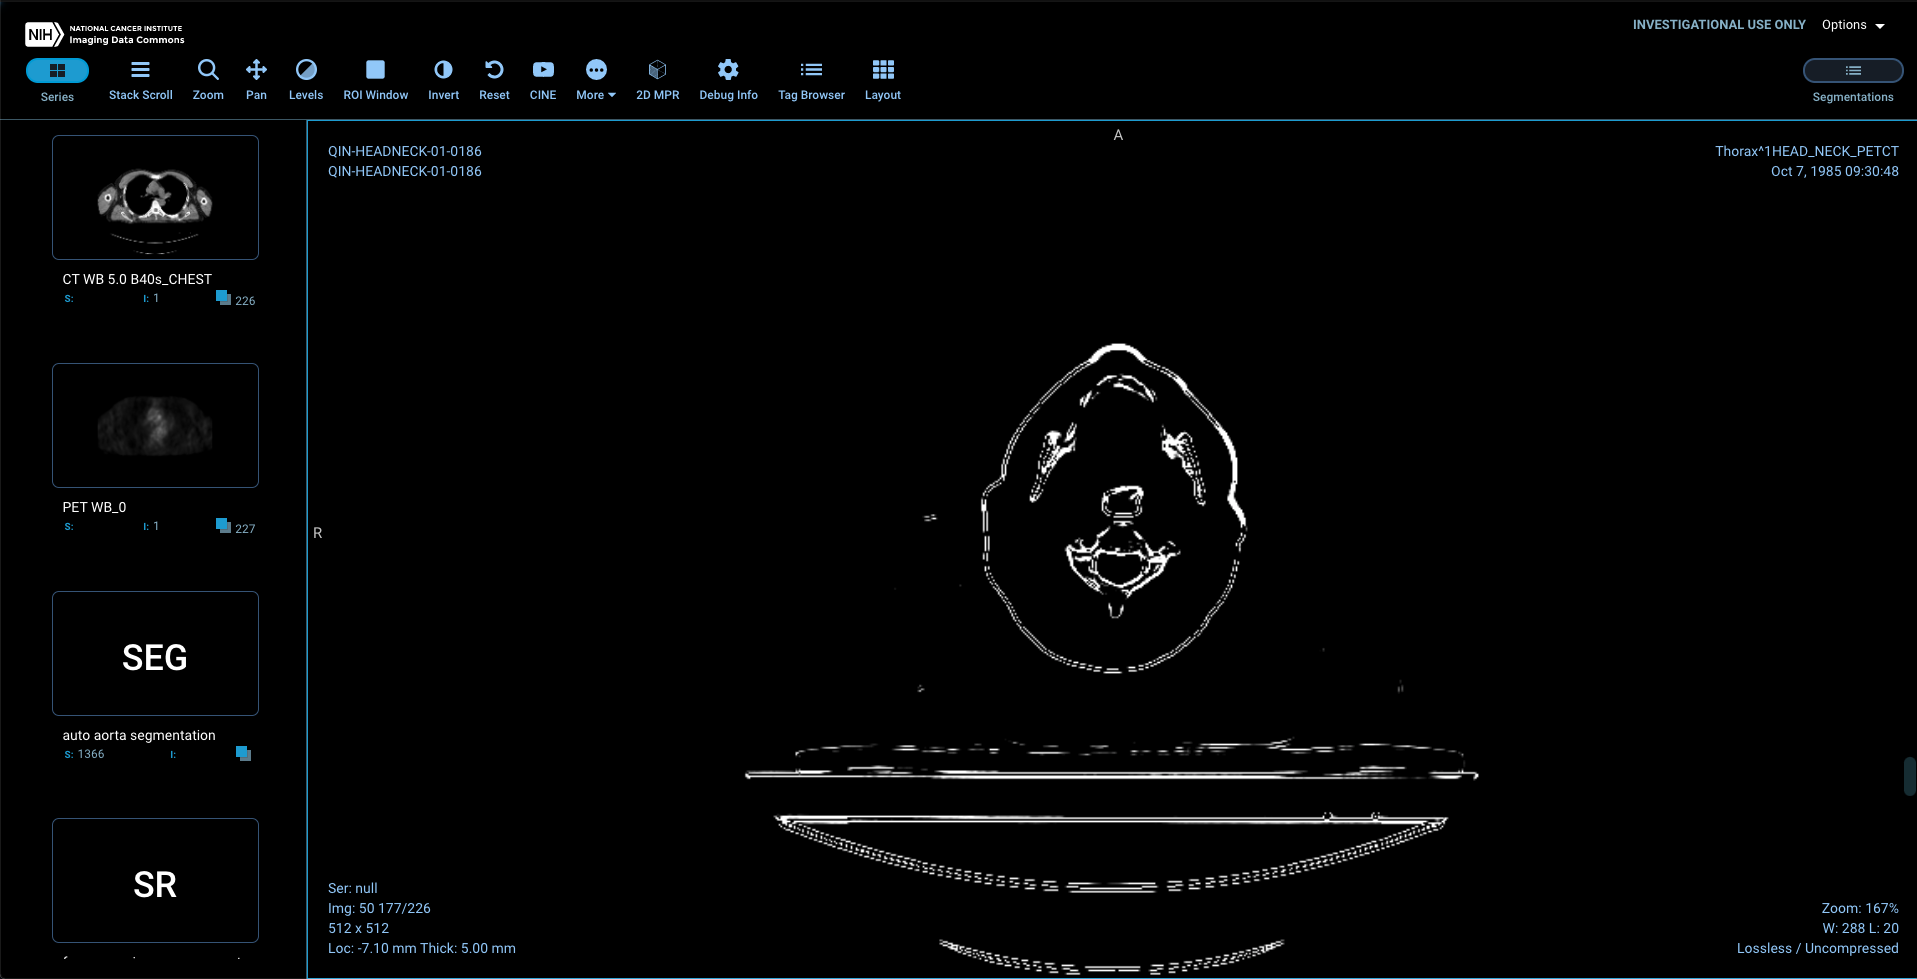

In [ ]:
# worked with redrawing by using the levels

In [ ]:
#
# SUPER BONUS (+33 extra): Can you trigger the redraw programmatically?
#

In [ ]:
# TODO: YOUR CODE FOR REDRAW GOES HERE

In [ ]:
#
# THANK YOU!!!
#
#       .--..--..--..--..--..--.
#     .' \  (`._   (_)     _   \
#   .'    |  '._)         (_)  |
#   \ _.')\      .----..---.   /
#   |(_.'  |    /    .-\-.  \  |
#   \     0|    |   ( O| O) | o|
#    |  _  |  .--.____.'._.-.  |
#    \ (_) | o         -` .-`  |
#     |    \   |`-._ _ _ _ _\ /
#     \    |   |  `. |_||_|   |
#     | o  |    \_      \     |     -.   .-.
#     |.-.  \     `--..-'   O |     `.`-' .'
#   _.'  .' |     `-.-'      /-.__   ' .-'
# .' `-.` '.|='=.='=.='=.='=|._/_ `-'.'
# `-._  `.  |________/\_____|    `-.'
#    .'   ).| '=' '='\/ '=' |
#    `._.`  '---------------'
#            //___\   //___\
#              ||       ||
#     LGB      ||_.-.   ||_.-.
#             (_.--__) (_.--__)
#
#